<a href="https://colab.research.google.com/github/carlos-souza-blip/RMHP/blob/main/RMHP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Banco de dados - RMHP, ano 2017.

In [ ]:
# importando Bibliotecas
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
from math import sqrt

In [ ]:
# Dados de 2017 (RMHP)
df = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/RMHP/main/rmhp_selecao_2017_GO_.csv', sep= ",")
df

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,28,A049,5,2017,1,0,2,0,0,0,0
1,2338262,1,38,F130,13,2017,1,0,4,1,1,0,0
2,2338262,1,86,I743,10,2017,5,0,3,0,0,0,0
3,2338262,3,60,K297,10,2017,3,0,3,0,0,0,0
4,2338262,1,37,K810,2,2017,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45925,7743068,3,57,M840,1,2017,2,0,1,0,0,0,0
45926,7743068,3,68,M840,5,2017,3,0,2,0,0,0,0
45927,7743068,1,28,M840,1,2017,1,0,1,0,0,0,0
45928,7743068,1,24,M841,2,2017,1,0,2,0,0,0,0


### Curva ROC

Encontrando o melhor modelo dentro dos parâmentros da curva ROC, com a finalidade de executar a regressão logística.

In [ ]:
modelo_0 = roc_auc_score(df.obito, df.sexo + df.fxidade)
print('Modelo 0 AUC: %0.2f' % modelo_0)
modelo_1 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50)
print('Modelo 1 AUC: %0.2f' % modelo_1)
modelo_2 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
print('Modelo 2 AUC: %0.2f' % modelo_2)
modelo_3 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
print('Modelo 3 AUC: %0.2f' % modelo_3)
modelo_4 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
print('Modelo 4 AUC: %0.2f' % modelo_4)
modelo_5 = roc_auc_score(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
print('Modelo 5 AUC: %0.2f' % modelo_5)
modelo_6 = roc_auc_score(df.obito, df.fxidade + df.cid50 + df.icc + df.ieh + df.permanencia + df.uso_uti)
print('Modelo 6 AUC: %0.2f' % modelo_6)

Modelo 0 AUC: 0.69
Modelo 1 AUC: 0.72
Modelo 2 AUC: 0.72
Modelo 3 AUC: 0.75
Modelo 4 AUC: 0.73
Modelo 5 AUC: 0.77
Modelo 6 AUC: 0.78


In [ ]:
def intervalo_conf_ROC(y_true, y_score):
    curva_roc = roc_auc_score(y_true, y_score)
    qtd = sum(y_true == 1)
    qtd_ = sum(y_true == 0)
    x = curva_roc / (2 - curva_roc)
    y = 2*curva_roc**2 / (1 + curva_roc)
    RQ = sqrt((curva_roc*(1 - curva_roc) + (qtd - 1)*(x - curva_roc**2) + (qtd_ - 1)*(y - curva_roc**2)) / (qtd*qtd_))
    lower = curva_roc - 1.96*RQ
    upper = curva_roc + 1.96*RQ

    return (lower, upper)

In [ ]:
# Intervalo de confiança para o modelo 6
intervalo_conf_ROC(df.obito, df.fxidade + df.cid50 + df.icc + df.ieh + df.permanencia + df.uso_uti)

(0.7744343991335527, 0.793793387408718)

In [ ]:
# Plotar gráfico
aleatorio = [0 for _ in range(len(df.obito))]
h_fpr, h_tpr, _ = roc_curve(df.obito, aleatorio)

a_fpr, a_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade)
b_fpr, b_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50)
c_fpr, c_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh)
d_fpr, d_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc)
e_fpr, e_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia)
f_fpr, f_tpr, _ = roc_curve(df.obito, df.sexo + df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)
g_fpr, g_tpr, _ = roc_curve(df.obito, df.fxidade + df.cid50 + df.ieh + df.icc + df.permanencia + df.uso_uti)

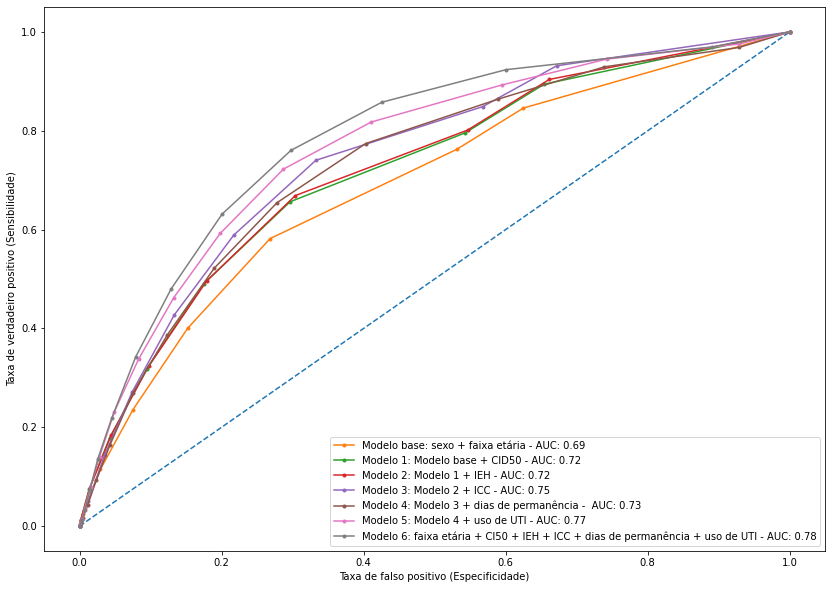

In [ ]:
pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )

pyplot.plot(a_fpr, a_tpr, marker='.', label='Modelo base: sexo + faixa etária - AUC: %0.2f' % modelo_0)
pyplot.plot(b_fpr, b_tpr, marker='.', label='Modelo 1: Modelo base + CID50 - AUC: %0.2f' %  modelo_1)
pyplot.plot(c_fpr, c_tpr, marker='.', label='Modelo 2: Modelo 1 + IEH - AUC: %0.2f' % modelo_2)
pyplot.plot(d_fpr, d_tpr, marker='.', label='Modelo 3: Modelo 2 + ICC - AUC: %0.2f' % modelo_3)
pyplot.plot(e_fpr, e_tpr, marker='.', label='Modelo 4: Modelo 3 + dias de permanência -  AUC: %0.2f' % modelo_4)
pyplot.plot(f_fpr, f_tpr, marker='.', label='Modelo 5: Modelo 4 + uso de UTI - AUC: %0.2f' % modelo_5)
pyplot.plot(g_fpr, g_tpr, marker='.', label='Modelo 6: faixa etária + CI50 + IEH + ICC + dias de permanência + uso de UTI - AUC: %0.2f' % modelo_6)

pyplot.xlabel('Taxa de falso positivo (Especificidade)')
pyplot.ylabel('Taxa de verdadeiro positivo (Sensibilidade)')
pyplot.legend()
pyplot.rcParams['figure.figsize'] = [14, 10]

#pyplot.savefig('curva_roc', format = 'png')
pyplot.show()

Logo, o melhor modelo para aplicar a regressão logística é o modelo_6. Pois nela, saberamos os óbitos esperados.

In [ ]:
# Organizando as variáveis conforme o modelo 6
dados = df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
dados.head(3)

,fxidade,cid50,ieh,icc,permanencia,uso_uti
0,1,0,0,0,2,0
1,1,0,0,0,4,1
2,5,0,0,0,3,0


# Aplicando a Regressão Logística

In [ ]:
# Separando os Dados para teste e treino
# Iremos trabalhar com os dados de treino para verificar o modelo de regressão com 0,7% dos dados separados
y = df.obito
X = pd.get_dummies(df[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 0)

In [ ]:
# Verificando o y_traino
y_train.value_counts()

0    29974
1     2177
Name: obito, dtype: int64

In [ ]:
reg_logistica = LogisticRegression()
reg_logistica.fit(X_train, y_train)
y_predict = reg_logistica.predict(X_train)

In [ ]:
print('Coeficientes:', reg_logistica.coef_)
print('Intercepto: %0.2f' %reg_logistica.intercept_)
print('R-squared: %0.2f' %reg_logistica.score(X_train, y_train))
print('Acurácia: %0.2f' %accuracy_score(y_train, reg_logistica.predict(X_train)))
print('Erro: %0.2f' %sqrt(mean_squared_error(y_train, y_predict)))

Coeficientes: [[ 0.45770354  1.09244614  0.3561526   0.28421522 -0.35691218  2.90000178]]
Intercepto: -4.08
R-squared: 0.94
Acurácia: 0.94
Erro: 0.25


In [ ]:
print(classification_report(y_train, reg_logistica.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     29974
           1       0.59      0.24      0.34      2177

    accuracy                           0.94     32151
   macro avg       0.77      0.61      0.65     32151
weighted avg       0.92      0.94      0.92     32151



In [ ]:
# Matriz de confusão
confusion_matrix = pd.crosstab(y_train, y_predict, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,29610,364
1,1659,518


In [ ]:
obito_esp = reg_logistica.predict_proba(X_train)[:,1]
obito_esp

array([0.15602353, 0.00906695, 0.01290568, ..., 0.01290568, 0.01833954,
       0.01833954])

In [ ]:
# Intervalo de Confiança - Curva ROC (depois da regressão)
intervalo_conf_ROC(y_train, obito_esp)

(0.8727447390074485, 0.8914448745357422)

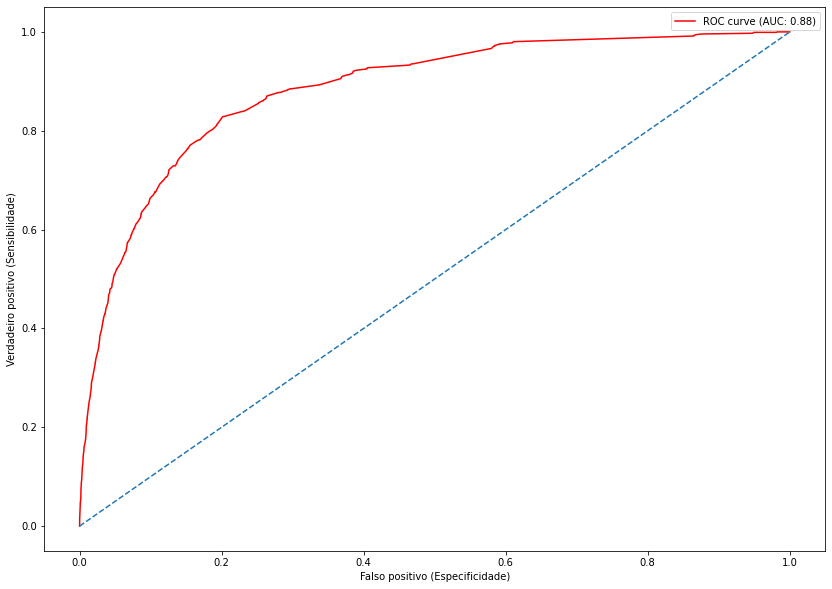

In [ ]:
def pyplot_plot(y_true, y_score):
  fpr, tpr, _ = roc_curve(y_true, y_score)
  pyplot.rcParams['figure.figsize'] = [11, 7]
  curve = roc_auc_score(y_true, y_score)
  pyplot.plot(fpr, tpr, color='red', label='ROC curve (AUC: %0.2f)' % curve)
  pyplot.plot(h_fpr, h_tpr, linestyle='--', label='' )
  pyplot.xlabel('Falso positivo (Especificidade)') 
  pyplot.ylabel('Verdadeiro positivo (Sensibilidade)')
  pyplot.legend()
  pyplot.show()

#pyplot.savefig('RLcurva_ROC', format = 'png')
pyplot_plot(y_train, obito_esp)

# Testando o modelo para o banco de dados inteiro

In [ ]:
dados_1 = reg_logistica.predict_proba(dados)[:,1]
print('Somatório dos óbitos esperados %0.0f' % dados_1.sum())

Somatório dos óbitos esperados 3109


In [ ]:
# óbitos observados (óbito = 1 e não óbito = 0)
df['obito'].value_counts()

0    42789
1     3141
Name: obito, dtype: int64

In [ ]:
# Calculando a taxa, somatória dos obitos observados / somatória dos óbitos esperados
Razao = 3141 / 3109
print('Razão de Mortalidade Hospitalar Padronizado em 2017 foi de %0.2f' % Razao)

Razão de Mortalidade Hospitalar Padronizado em 2017 foi de 1.01


Usando o modelo da regressão logística já treinado, obtivemos  por meio da função (predict_proba), cujo comando calcula a chance de cada individuo morrer com tais parâmetros aplicados. Para saber o número esperado de morte, é a somatória das probabilidades preditas.

# Série Histórica (2014 - 2020)

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/carlos-souza-blip/RMHP/main/rmhp_selecao_GO_SH.csv', sep=",")
dataset

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,75,A318,4,2014,4,1,2,0,0,0,0
1,2338262,1,40,A480,1,2014,1,0,1,0,0,0,0
2,2338262,1,76,B873,3,2014,4,0,2,0,0,0,0
3,2338262,3,30,A419,11,2014,1,1,4,0,0,0,0
4,2338262,1,38,A480,3,2014,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316655,7743068,1,55,B169,1,2020,2,0,1,1,1,0,0
316656,7743068,1,40,B169,2,2020,1,0,2,0,1,0,0
316657,7743068,1,51,B178,2,2020,2,0,2,0,0,0,0
316658,7743068,1,33,B188,3,2020,1,0,2,1,1,1,0


In [ ]:
#removendo o ano de 2020
indexNames = dataset[ dataset['ano'] == 2020 ].index
dataset.drop(indexNames , inplace=True)
dataset

,cnes,sexo,idade,diag_princ,dias_perm,ano,fxidade,cid50,permanencia,uso_uti,obito,icc,ieh
0,2338262,3,75,A318,4,2014,4,1,2,0,0,0,0
1,2338262,1,40,A480,1,2014,1,0,1,0,0,0,0
2,2338262,1,76,B873,3,2014,4,0,2,0,0,0,0
3,2338262,3,30,A419,11,2014,1,1,4,0,0,0,0
4,2338262,1,38,A480,3,2014,1,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270484,7743068,1,50,B169,11,2019,2,0,4,0,0,0,0
270485,7743068,3,24,B178,4,2019,1,0,2,0,0,0,0
270486,7743068,1,60,B178,2,2019,3,0,2,0,0,0,0
270487,7743068,3,46,B188,7,2019,1,0,3,0,0,1,0


In [ ]:
# Salvar a base de dados
#dataset.to_csv('rmhp_selecao_GO_SH.csv')

In [ ]:
# Separado os anos;
# Aplicando o modelo 6, segundo a curva ROC.
sh14 = dataset.loc[dataset['ano'] == 2014]
sh14 = sh14[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh15 = dataset.loc[dataset['ano'] == 2015]
sh15 = sh15[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh16 = dataset.loc[dataset['ano'] == 2016]
sh16 = sh16[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh17 = dataset.loc[dataset['ano'] == 2017]
sh17 = sh17[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh18 = dataset.loc[dataset['ano'] == 2018]
sh18 = sh18[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
sh19 = dataset.loc[dataset['ano'] == 2019]
sh19 = sh19[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]
df3 = dataset[['fxidade', 'cid50', 'ieh', 'icc', 'permanencia', 'uso_uti']]

In [ ]:
# Tabela de Contigência 2x2
obitod = dataset.groupby('ano')['obito'].value_counts()
print(obitod)
df6 = dataset['obito'].value_counts()
print(df6)

ano   obito
2014  0        33295
      1         2387
2015  0        36886
      1         2707
2016  0        38934
      1         3045
2017  0        42789
      1         3141
2018  0        48512
      1         3440
2019  0        51536
      1         3817
Name: obito, dtype: int64
0    251952
1     18537
Name: obito, dtype: int64


In [ ]:
sh14_ = reg_logistica.predict_proba(sh14)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh14_.sum(), 'em 2014.')
sh15_ = reg_logistica.predict_proba(sh15)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh15_.sum(), 'em 2015.')
sh16_ = reg_logistica.predict_proba(sh16)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh16_.sum(), 'em 2016.')
sh17_ = reg_logistica.predict_proba(sh17)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh17_.sum(), 'em 2017.')
sh18_ = reg_logistica.predict_proba(sh18)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh18_.sum(), 'em 2018.')
sh19_ = reg_logistica.predict_proba(sh19)[:,1]
print('Somatória dos óbitos esperados %0.0f' % sh19_.sum(), 'em 2019.')

# Rodando o modelo para o banco de dados inteiro
df4 = reg_logistica.predict_proba(df3)[:,1]
print('Somatória dos óbitos esperados %0.0f' % df4.sum())

Somatória dos óbitos esperados 2170 em 2014.
Somatória dos óbitos esperados 2449 em 2015.
Somatória dos óbitos esperados 2752 em 2016.
Somatória dos óbitos esperados 3109 em 2017.
Somatória dos óbitos esperados 3795 em 2018.
Somatória dos óbitos esperados 4192 em 2019.
Somatória dos óbitos esperados 18468


In [ ]:
def intervalo_conf_esp(x):
  n = 6
  soma_esp = (sh14_+sh15_+sh16_+sh17_+sh18_+sh19_)
  media = soma_esp / n
  y = ((sh14_ - media) + (sh15_ - media) + (sh16_ - media)
  + (sh17_ - media)  + (sh18_ - media) + (sh19_ - media))**2
  rq = sqrt((y/n))
  lower = media - (1.96 * (rq/sqrt(n)))
  upper = media + (1.96 * (rq/sqrt(n))) 

  return(lower, upper)

In [ ]:
razao14 = 2387 / 2170
print('Razão de mortalidade hospitalar padronizada em 2014 de %0.2f' % razao14)
razao15 = 2707 / 2449
print('Razão de mortalidade hospitalar padronizada em 2015 de %0.2f' % razao15)
razao16 = 3045 / 2752
print('Razão de mortalidade hospitalar padronizada em 2016 de %0.2f' % razao16)
razao17 = 3141 / 3109
print('Razão de mortalidade hospitalar padronizada em 2017 de %0.2f' % razao17)
razao18 = 3440 / 3795
print('Razão de mortalidade hospitalar padronizada em 2018 de %0.2f' % razao18)
razao19 = 3817 / 4192
print('Razão de mortalidade hospitalar padronizada em 2019 de %0.2f' % razao19)

# Cálculo RMHP para o banco de dados inteiro
razaodf4 = 18537 / 18468
print('Razão de mortalidade hospitalar padronizada da série histórica de %0.2f' % razaodf4)

Razão de mortalidade hospitalar padronizada em 2014 de 1.10
Razão de mortalidade hospitalar padronizada em 2015 de 1.11
Razão de mortalidade hospitalar padronizada em 2016 de 1.11
Razão de mortalidade hospitalar padronizada em 2017 de 1.01
Razão de mortalidade hospitalar padronizada em 2018 de 0.91
Razão de mortalidade hospitalar padronizada em 2019 de 0.91
Razão de mortalidade hospitalar padronizada da série histórica de 1.00


In [ ]:
def intervalo_conf_rmhp(observado, esperado):
  lower = observado/esperado * (1 - 1/(9*observado) - 1.96 / (3 * sqrt(observado)))**3
  lower = "{:.2f}".format(lower)
  upper = (observado+1)/esperado * (1 - 1/(9*(1+observado)) + 1.96 / (3 * sqrt(observado+1)))**3
  upper = "{:.2f}".format(upper)
  return (lower, upper)

In [ ]:
# intervalo de confiança para o ano de 2017.
intervalo_conf_rmhp(3141, 3109)

('0.98', '1.05')

In [ ]:
# intervalo de confiança para a série histórica (2014 - 2019)
intervalo_conf_rmhp(18537, 18468)

('0.99', '1.02')

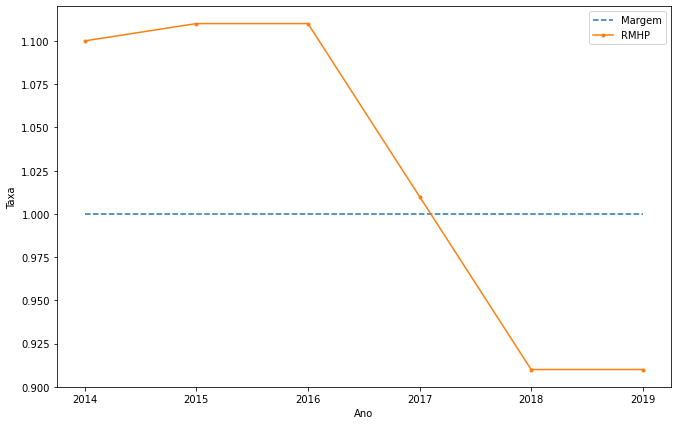

In [ ]:
taxa = [1.10, 1.11, 1.11, 1.01, 0.91, 0.91]
ano = [2014, 2015, 2016, 2017, 2018, 2019]
linha = [1, 1, 1, 1, 1, 1]

pyplot.plot(ano, linha, linestyle='--', label='Margem')
pyplot.plot(ano, taxa, marker='.', label='RMHP')

pyplot.xlabel('Ano')
pyplot.ylabel('Taxa')
pyplot.legend()
pyplot.rcParams['figure.figsize'] = [12, 8]

# Salvar o grafico como imagem
pyplot.savefig('RMHP_Taxa', format = 'png')

pyplot.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py

trace = go.Scatter(x = ano, y = linha, mode = "lines", name = "RMHP (dentro do esperado)",
                    marker = dict(color = 'blue'), text= "")

trace1 = go.Scatter(x = ano, y = taxa, mode = "lines+markers", name = "Taxa RMHP",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'))

data = [trace, trace1]

layout = dict(title = '',
              xaxis= dict( title = 'ANO', ticklen=30, zeroline= False),
              yaxis = dict(title = 'Taxa', ticklen=30, zeroline= False ))

fig = dict(data = data, layout = layout)

py.iplot(fig)